## LAA Assignment
### Himanshu, MDS202327

In [28]:
import setuptools
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [30]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [31]:
# Reshape the images to 1D arrays
train_X = train_X.reshape((60000, 28 * 28))

# Initialize a dictionary to hold the matrices for each digit
digitMatrix = {i: [] for i in range(10)}

for image, label in zip(train_X, train_y):
    digitMatrix[label].append(image)

# Convert the lists to numpy arrays, take transpose to get images as columns
for i in range(10):
    digitMatrix[i] = np.array(digitMatrix[i]).T

In [32]:
# Perform SVD on each digit matrix and extract the first 4 left singular vectors
svdMatrix = {i: np.linalg.svd(D, full_matrices=False)[0][:, :4] for i, D in digitMatrix.items()}

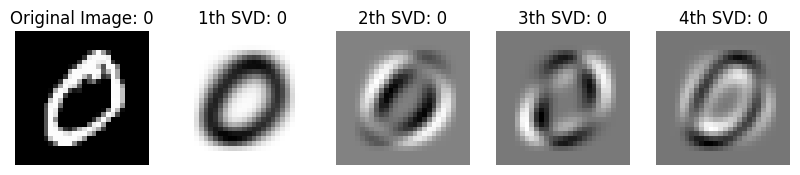

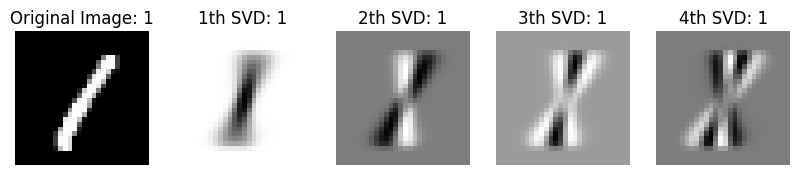

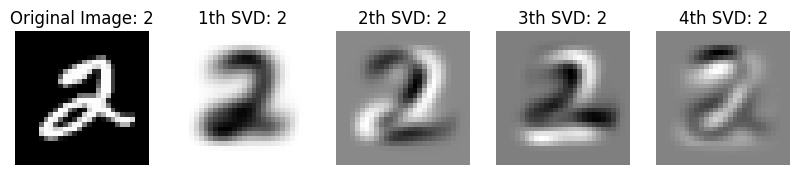

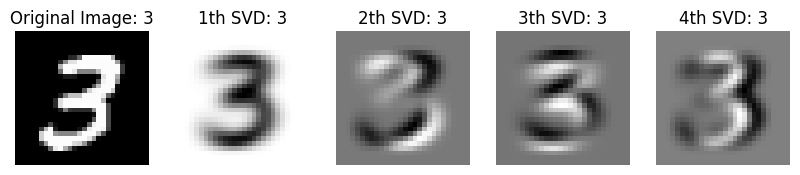

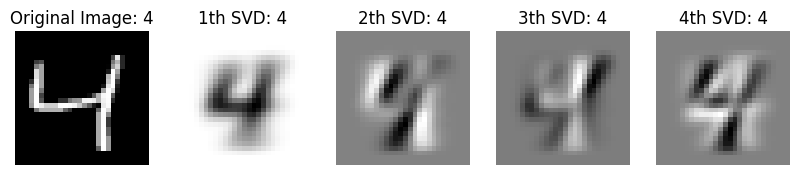

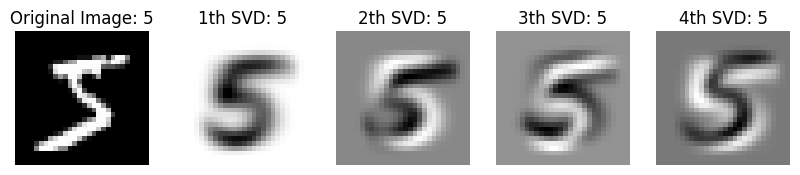

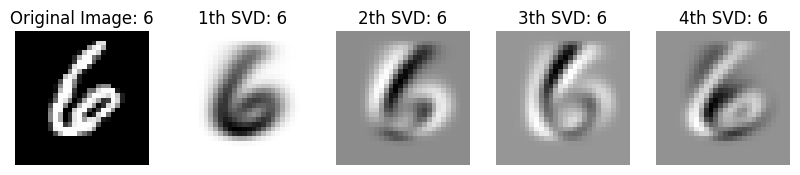

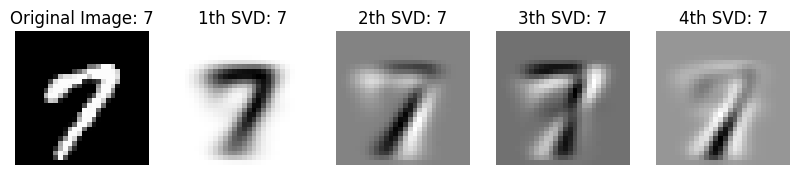

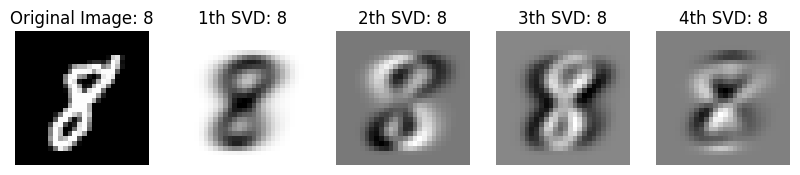

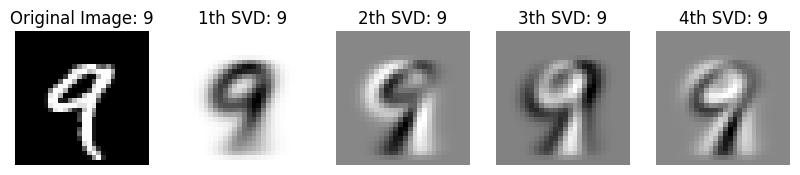

In [37]:
for i, U in svdMatrix.items():
    plt.figure(figsize=(10, 2))
    for j in range(5):
        plt.subplot(1, 5, j + 1)
        if j == 0:
            plt.title(f'Original Image: {i}')
            plt.imshow(digitMatrix[i][:, 0].reshape(28, 28), cmap='gray')
        else:
            plt.title(f'{j}th SVD: {i}')
            plt.imshow(U[:, j - 1].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

The expression is used to compute the projection error of a test image z with respect to each digit subspace.

The U @ U.T @ z part computes the projection of z onto the subspace.

z - U @ U.T @ z computes the residual vector, which is the difference between z and its projection.

The norm of this residual vector is then computed as the projection error.

The reason for using this particular expression is that it allows us to measure how close z is to each digit subspace. The digit that gives the smallest projection error is the predicted digit for z. This method is efficient because it only involves matrix-vector multiplications and norm computations, and it uses a low-rank approximation of the digit matrices.

In [49]:
# Classification function
def svdClassifier(z, svdMatrix):
    z = z.reshape(784)

    min_norm = float('inf')
    predicted_digit = None

    for i, U in svdMatrix.items():

        # Compute the residual vector
        residual = z - U @ U.T @ z

        # Compute the norm of the residual vector
        norm = np.linalg.norm(residual)

        if norm < min_norm:
            min_norm = norm
            predicted_digit = i

    return predicted_digit

In [51]:
y_pred = [svdClassifier(img, svdMatrix) for img in test_X]

cm = confusion_matrix(test_y, y_pred)
accuracy = accuracy_score(test_y, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

Confusion Matrix:
[[ 956    1    0    0    0    6   11    1    5    0]
 [   0 1126    2    1    0    1    4    0    1    0]
 [  21   13  913   13   11    1   11   14   34    1]
 [   3    3   11  912    0   38    3   13   21    6]
 [   2   11    3    2  865    0   21    2    5   71]
 [  15    2    2   14    6  799   12    2   33    7]
 [  24    3    0    0    8    6  915    0    2    0]
 [   3   22   18    0   12    3    0  914    2   54]
 [   5   11    5   22    2   34    9    8  864   14]
 [   7    8    2    7   43    8    3   26   15  890]]
Accuracy: 0.9154
